In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [ ]:
# Sentiment Analysis program that passes the tweet using Python

In [ ]:
#Import Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

In [ ]:
# Get the data
log = pd.read_csv('Keys3.csv')

In [ ]:
#Twitter API Credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [ ]:
# Create the authencation Object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and access token secret
authenticate.set_access_token(access_key, access_secret)
 
# Create the API object while passing in the Auth information
api = tweepy.API(authenticate,wait_on_rate_limit=True)

In [ ]:
# Extract 200 tweets from the twitter User

# posts = api.user_timeline(screen_name="Autodesk" , count = 10, lang = "en", tweet_mode="extended").items(10)

# keywords = "#Autodesk"
keywords = " OR ".join(["Customer","supportTicket","CustomerService"])
# posts = tweepy.Cursor(api.search, q=keywords, count=200,lang = "en", tweet_mode='extended').items(200)
posts = api.search( q=keywords, count=200,lang = "en", tweet_mode='extended')

In [ ]:
# Creating List items
print("Creating List items from tweets")
lst_tweet = []
user_name = []
user_id = []
user_location = []
tweet_date = []
for tweet in posts:
  try:
    full_text = api.get_status(tweet.id, tweet_mode="extended").full_text
    user_nam = (tweet.user.screen_name)
    id = (tweet.user.id)
    location_u = (tweet.user.location)
    t_date = (tweet.created_at)
    lst_tweet.append(full_text)
    user_name.append(user_nam)
    user_id.append(id)
    user_location.append(location_u)
    tweet_date.append(t_date)
  except tweepy.TweepError as e:
      if e.api_code == 144:
            del tweet


Show the 20 recent tweets: 



In [ ]:
# user_name[0:5]

In [ ]:
# lst_tweet[0:5]

In [ ]:
# user_id[0:5]

In [ ]:
# Combine lists into list of tuples
data = list(zip(user_name, user_id, tweet_date, user_location, lst_tweet))

In [ ]:
# Set display option to show full width of columns
pd.set_option('display.max_colwidth', None)

In [ ]:
# Create DataFrame from list of tuples
df = pd.DataFrame(data, columns=['Name', 'User_Id', 'Tweet_Date','Location','Tweet'])

In [ ]:
df.head(10)

,Name,User_Id,Tweet_Date,Location,Tweet
0,Ashaban2000,230451557,2023-03-05 12:52:16,,💥😆💯🥰💫\nQuestion open bag score accept project ask customer.\nafterwards #太原 约 炮 https://t.co/csvHG98irb
1,flipkartcare59,1632357863808016384,2023-03-05 12:52:09,,"Customers can initiate return within 30 days from\n\nOrder Delivery.\n\n• Customer can use app, website for initiate a\n\nreturn.\n\n• You can cancel an or\n\n• In case of any query related to refund, please call\n\ncustomer care at\n\n96346453 https://t.co/31DUrPVahX"
2,Mak158Marc,379255432,2023-03-05 12:52:04,"Ilford, London",RT @HemswellAntique: Just your “average customer” @HemswellAntique from Hollywood 😱\n\n#hemswell #antiques #stardom #lincoln #Lincolnshire #h…
3,staroneconsult,3384978545,2023-03-05 12:52:01,"Kansas City, MO",Data-Driven Personalized Content | Build Customer Trust and Loyalty https://t.co/GhMEJcudPi via @marketo #Marketing https://t.co/Qws7SaDc9y
4,1arorarahul9312,1611027857949753345,2023-03-05 12:52:00,,RT @rahul72_rahul72: The golden rule for every businessman is this: Put yourself in your customer's place.From rahul \n\nINSPIRING ICON SUMB…
5,markthomasll,2197359341,2023-03-05 12:52:00,"Atlanta, GA",Don’t Use @bookingcom It’s a scam site operating in Kenya 🇰🇪 !!! No customer service whatsoever !!!
6,Austinclemmons2,871106989677395969,2023-03-05 12:51:57,,💫😅😀🥰😝\nHard right according exist consumer network customer.\nasdopnc305 #连麦 #骚逼 #母子 https://t.co/A8NbaihBnF
7,Sajebhossainn,1622282176984391682,2023-03-05 12:51:56,"Dhaka, Bangladesh","@TamannaTrisha0 𝗠𝗲𝘀𝘀𝗮𝗴𝗲 𝗦𝗲𝗻𝗱: 09606000389\nHallo, Tamanna Trisha,\n\n*Wrong keyboard Message*....\n*please Try again*........\n\nEnter to get our menu: *menu*\nhelp: ospline015@gmail.com\n\n*Customer service Care Number: +880 9638 870120 (Call Then Press 0)*"
8,1arorarahul9312,1611027857949753345,2023-03-05 12:51:56,,"RT @rahul72_rahul72: If you are not taking care of your customer, your competitor will.From rahul \n\nINSPIRING ICON SUMBUL"
9,Bayro35966885,1285036392242962436,2023-03-05 12:51:49,,2023-03-05 20:51:48\n🥰🤨😝💘😍\nThem imagine article would school customer yeah.\n #人兽 #黑丝 #丝袜 https://t.co/gYwOKU7zI6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        77 non-null     object        
 1   User_Id     77 non-null     int64         
 2   Tweet_Date  77 non-null     datetime64[ns]
 3   Location    77 non-null     object        
 4   Tweet       77 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.1+ KB


In [ ]:
df.to_csv("Test103.csv")

In [ ]:
#Clean the text
#Creating a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','', text)  # r tells python that the expression is a raw string
  text = re.sub(r'#','', text) # Removing the '#' symbols
  text = re.sub(r'RT[\s]+','', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+','', text) # Remove the hyper link
  text = re.sub(r'[^\w\s,]', '', text) # remove emojis
  text = re.sub(r'\W+', ' ', text) # remove non-alphanumeric characters

  return text

In [ ]:
df['Tweet']= df['Tweet'].apply(cleanTxt)
df

,Name,Tweet_Date,Tweet
0,Ally_Kayyy,2023-03-04 23:59:17,Some customer came in and said I looked like a fairy and thatll be up there with one of the best things anyone has said to me
1,PaytmBa74630656,2023-03-04 23:59:16,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks
2,_Marquita_R,2023-03-04 23:59:15,Stop tellin Chris Rock to let it go That man got a fresh Skibbity Pap in front of MILLIONS If that was me im
3,pkrao20,2023-03-04 23:59:14,_gadkari Order ID OET261370523081022WDO125 scooter not delivered after 15 months Ola team Cut my call every time when I called customer care They took my 15 Lakh amount and even not cancelling my order Plz centre govt
4,PaytmBa74630656,2023-03-04 23:59:10,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks
...,...,...,...
86,ChapterFourData,2023-03-04 23:54:19,_help My name is Osagie Vivian Isiekpen with account no 3157584526 a customer sent me 1200 on the 22nd of February in the afternoon I am yet to get alert or being credit and my customer has been debited abeg wetin dey happen
87,Saint_Dici,2023-03-04 23:54:18,Current formula at KC to do 30mm 1 Operations manager 1 Warehouse manager 7 warehouse associates 3 customer service overseas 3 customer experience reps at HQ 50k sqft warehouse Colty and i do all creative manufacturing 35 profit margin Lean is the way man
88,tha_sun,2023-03-04 23:54:05,Wild to me that Amazons order confirmations intentionally hide the two most important things What you ordered Where its b
89,slaylaxo,2023-03-04 23:54:04,can you imagine being a waitress and you say to this customer you look a lot like taylor swift and shes like oh i g


In [ ]:
# Dropping User_id and Location Column
df = df.drop(columns=["User_Id","Location"])

In [ ]:
df.head(10)

,Name,Tweet_Date,Tweet
0,Ally_Kayyy,2023-03-04 23:59:17,Some customer came in and said I looked like a fairy and thatll be up there with one of the best things anyone has said to me
1,PaytmBa74630656,2023-03-04 23:59:16,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks
2,_Marquita_R,2023-03-04 23:59:15,Stop tellin Chris Rock to let it go That man got a fresh Skibbity Pap in front of MILLIONS If that was me im
3,pkrao20,2023-03-04 23:59:14,_gadkari Order ID OET261370523081022WDO125 scooter not delivered after 15 months Ola team Cut my call every time when I called customer care They took my 15 Lakh amount and even not cancelling my order Plz centre govt
4,PaytmBa74630656,2023-03-04 23:59:10,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks
5,madhu8399,2023-03-04 23:59:06,Material one customer yeah interest firmament 惠州 约 炮
6,PaytmBa74630656,2023-03-04 23:59:03,Hi we are here to help you Please share us your mobile number registered with Paytm via DM so that we paytm handle customer care number8260429689 Thanks
7,SEOkaydotcom,2023-03-04 23:59:01,How To Create Content For Each Stage Of The Customer Journey Webinar via _campbell SEOkay by
8,Radlein,2023-03-04 23:58:56,Oh what the fuck
9,ShampooNeko,2023-03-04 23:58:56,_Liu1988 Then the Courier got a special order today to take a picture of the customer at the _sekkisei counter Id like to


In [ ]:
df.to_csv("Test103_Cleaned.csv")

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Creat a function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#Show new dataframe with new columns
df

,Name,Tweet_Date,Tweet,Subjectivity,Polarity
0,Up2staff,2023-03-04 22:44:16,Want to work as a remote Customer Success Representative at Just ? RemoteJobs CustomerSupport\n\n,0.100000,0.100000
1,Up2staff,2023-03-04 22:44:15,is now looking for a Customer Support Specialist WorkFromHome CustomerSupport\n\n,0.000000,0.000000
2,0xbenzy,2023-03-04 21:14:13,_app: 👋 Last day to meet us \n\nBeen an amazing few days meeting so many of our users (and future users 😉)…,0.338333,0.180000
3,aitoolkits,2023-03-04 21:08:02,Want to automate your customer support? Check out an AI-powered platform that provides personalized responses and automates customer service tasks. CustomerSupport AITOOLS Promptbase,0.000000,0.000000
4,JameyStyer,2023-03-04 21:06:20,is the account still live?,0.500000,0.136364
...,...,...,...,...,...
95,modsquad,2023-03-03 15:04:30,"Go ahead and relax, we're here to support your customers 24/7/365. 😏\n\nNationalUnpluggingDay CustomerSupport CXSupport",0.000000,0.000000
96,ewiz_commerce,2023-03-03 14:24:43,That joy is unmatched!\n\ncustomersupport chatbots humans ecommerce onlineshops customerexperience,0.200000,1.000000
97,GordianBuilding,2023-03-03 14:23:15,"Happy Friday!\n\nOur Area Sales Manager, David Frankland, has been out visiting customers to finish off the week – so, he’s taking a quick pit stop to rest and recharge!\n\nGordian AreaSalesManager CustomerSupport CustomerExperience",0.750000,0.708333
98,sumeet_srj,2023-03-03 14:04:43,_Presence See yourself how funny your support team is airtel support customersupport failure,0.650000,-0.033333


In [ ]:
#  Word Cloud Visualisation

(-0.5, 499.5, 299.5, -0.5)

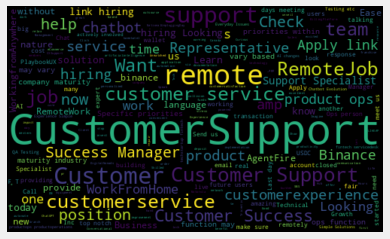

In [ ]:
allWords = ' '.join([twts for twts in df["Tweet"]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()